In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mne

from load import load_data


In [2]:
eeg1, eeg2, eeg3, eeg4, eeg5, eeg6, eeg7, pulse, x, y, z = load_data()

In [3]:
def sync(array, order):
    return [duplicate for element in array for duplicate in [element] * order]

In [4]:
idx = 3

sample = [eeg1.iloc[idx, :], 
          eeg2.iloc[idx, :], 
          eeg3.iloc[idx, :], 
          eeg4.iloc[idx, :], 
          eeg5.iloc[idx, :], 
          eeg6.iloc[idx, :], 
          eeg7.iloc[idx, :],
          sync(pulse.iloc[idx, :], 5),
          sync(x.iloc[idx, :], 5),
          sync(y.iloc[idx, :], 5),
          sync(z.iloc[idx, :], 5)]

In [5]:
info = mne.create_info(ch_names = ["Fpz", "O1", "O2", "F8", "Fp2", "F7", "Fp1", "pulse", "x", "y", "z"],
                       sfreq = 50.,
                       ch_types = [*['eeg'] * 7, 'ecg', *['eog'] * 3 ])

raw = mne.io.RawArray(sample, info=info)

# raw.set_eeg_reference(['Fp2'])

Creating RawArray with float64 data, n_channels=11, n_times=1500
    Range : 0 ... 1499 =      0.000 ...    29.980 secs
Ready.


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 165 samples (3.300 sec)



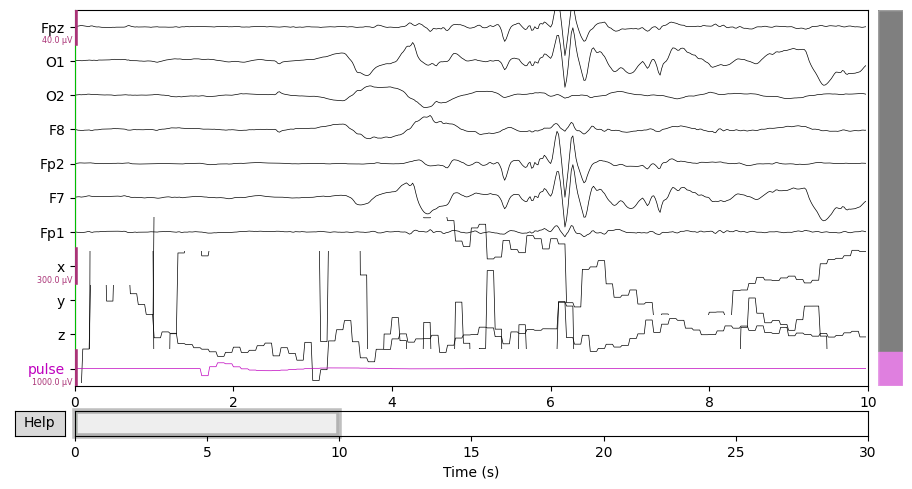

In [6]:
%matplotlib qt
filt_raw = raw.copy()
filt_raw.filter(l_freq=1., h_freq=None)
filt_raw.plot(n_channels=11)

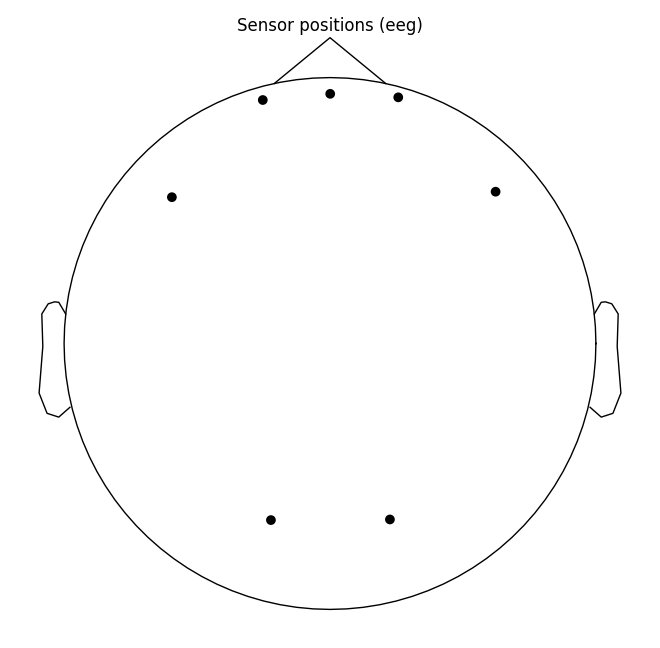

In [7]:
raw.set_montage("standard_1020")
raw.plot_sensors(ch_type='eeg')

In [8]:
# ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
# avg_ecg_epochs = ecg_epochs.average()
# avg_ecg_epochs.plot_joint(times=[-0.25, -0.025, 0, 0.025, 0.25])

In [8]:
ica = mne.preprocessing.ICA(n_components=5)
ica.fit(raw)

Fitting ICA to data using 7 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 5 components
Fitting ICA took 0.2s.


<ICA | raw data decomposition, fit (fastica): 1500 samples, 5 components, channels used: "eeg">

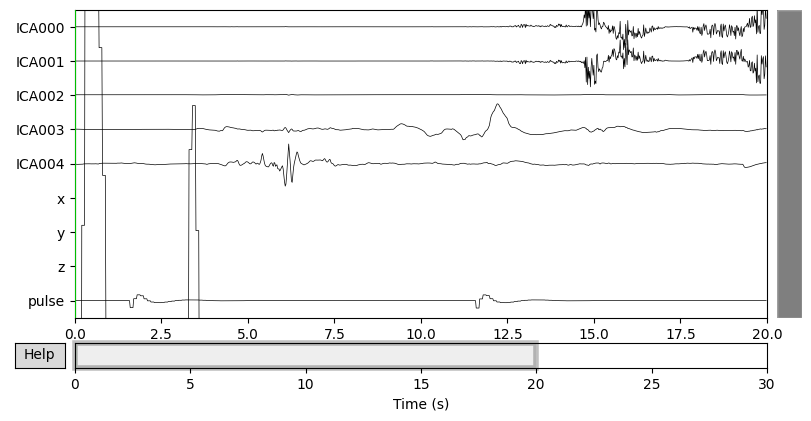

In [10]:
ica.plot_sources(raw)

In [11]:
ica.plot_components()

[<Figure size 975x235.5 with 5 Axes>]

Transforming to ICA space (5 components)
Zeroing out 1 ICA component


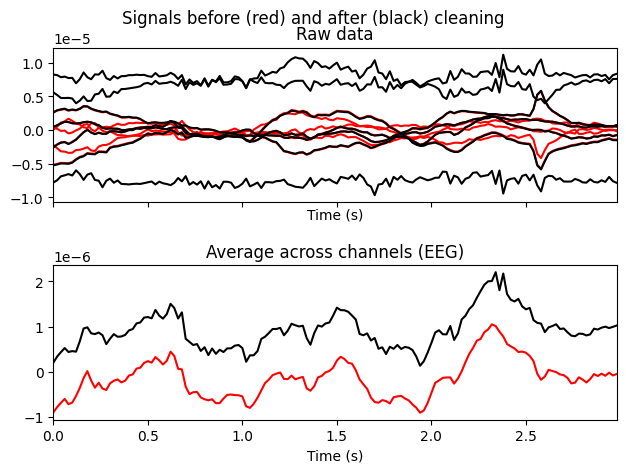

In [12]:
ica.plot_overlay(raw, exclude=[0], picks='eeg')

In [9]:
ica.plot_properties(raw, picks=[2, 3])

    Using multitaper spectrum estimation with 7 DPSS windows


RuntimeError: No digitization points found.